En el siguiente notebook, se va a trabajar con los datos con el fin de poder sacar el máximo provecho de los datos de una forma más ordenada, detectando los valores faltantes, los datos duplicados y atípicos para que no afecte de manera negativa al análisis. 


In [2]:
# Se importan las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
# Se cargan los datos de la hoja llamada Accesos Por Tecnología 
df_internet_axt = pd.read_excel('../Data/Internet.xlsx', sheet_name='Accesos Por Tecnología')

In [24]:
df_internet_axt.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0


In [5]:
# Se realiza una búsqueda de los valores faltantes
valores_faltantes = df_internet_axt.isnull().sum()

# Muestra de los valores faltantes
valores_faltantes = valores_faltantes[valores_faltantes > 0]
valores_faltantes


Año             1
Trimestre       1
Provincia       2
ADSL            2
Cablemodem      2
Fibra óptica    2
Wireless        2
Otros           2
Total           2
dtype: int64

In [34]:
# Cambiar valores faltantes por un valor cero (0)
df_internet_axt = df_internet_axt.fillna(0)


In [35]:
# Se realiza una nueva búsqueda de los valores faltantes
valores_faltantes = df_internet_axt.isnull().sum()

# Muestra de los valores faltantes
valores_faltantes = valores_faltantes[valores_faltantes > 0]
valores_faltantes


Series([], dtype: int64)

Después de detectar los valores nulos, se procede a reemplazarlos con el valor de 0 en cada uno de ellos, para que no afecte a posteriores análisis

In [6]:
# Verificación de registros duplicados
duplicados = df_internet_axt.duplicated().sum()
duplicados

0

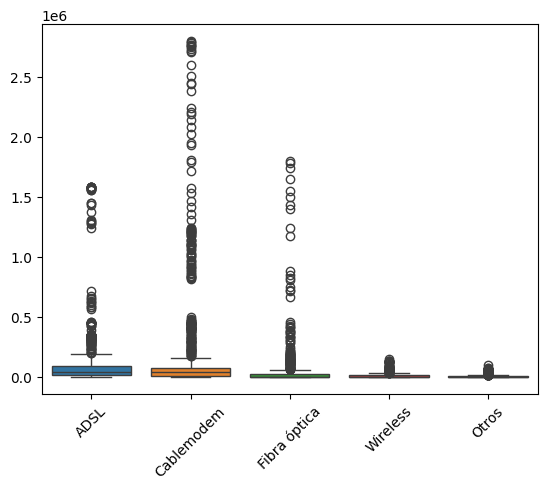

In [39]:
# Se crea un boxplot para detectar valores atípicos

sns.boxplot(data=df_internet_axt[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']])
plt.xticks(rotation=45)
plt.show()

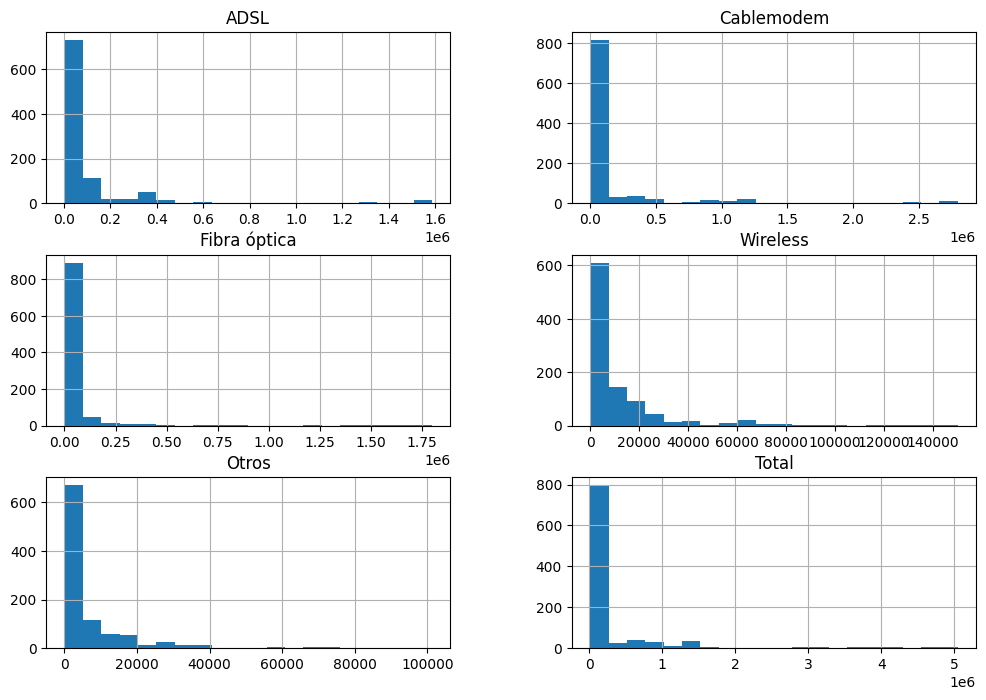

In [11]:
# Histograma para cada tecnología
df_internet_axt[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].hist(bins=20, figsize=(12, 8))
plt.show()


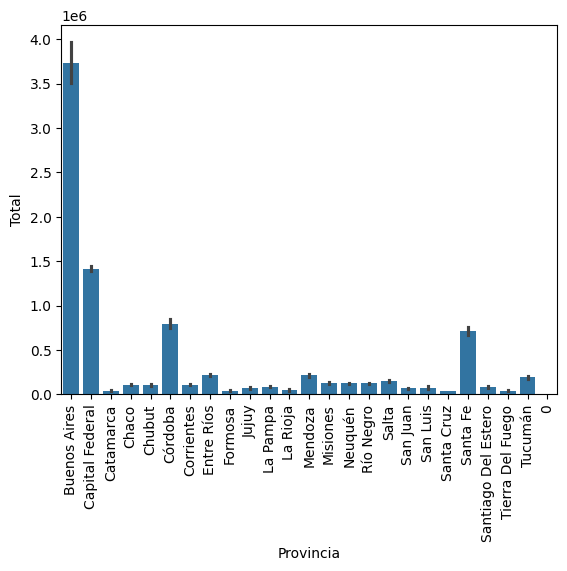

In [37]:
# Analizar la relación entre el tipo de conexión y la provincia
sns.barplot(data=df_internet_axt, x='Provincia', y='Total')
plt.xticks(rotation=90)
plt.show()

In [41]:
# Función para mapear trimestre a fecha
def trimestre_a_fecha(año, trimestre):
    if trimestre == 1:
        return pd.Timestamp(f'{año}-01-01')
    elif trimestre == 2:
        return pd.Timestamp(f'{año}-04-01')
    elif trimestre == 3:
        return pd.Timestamp(f'{año}-07-01')
    elif trimestre == 4:
        return pd.Timestamp(f'{año}-10-01')

# Aplicar la función al DataFrame
df_internet_axt['Fecha'] = df_internet_axt.apply(lambda row: trimestre_a_fecha(row['Año'], row['Trimestre']), axis=1)


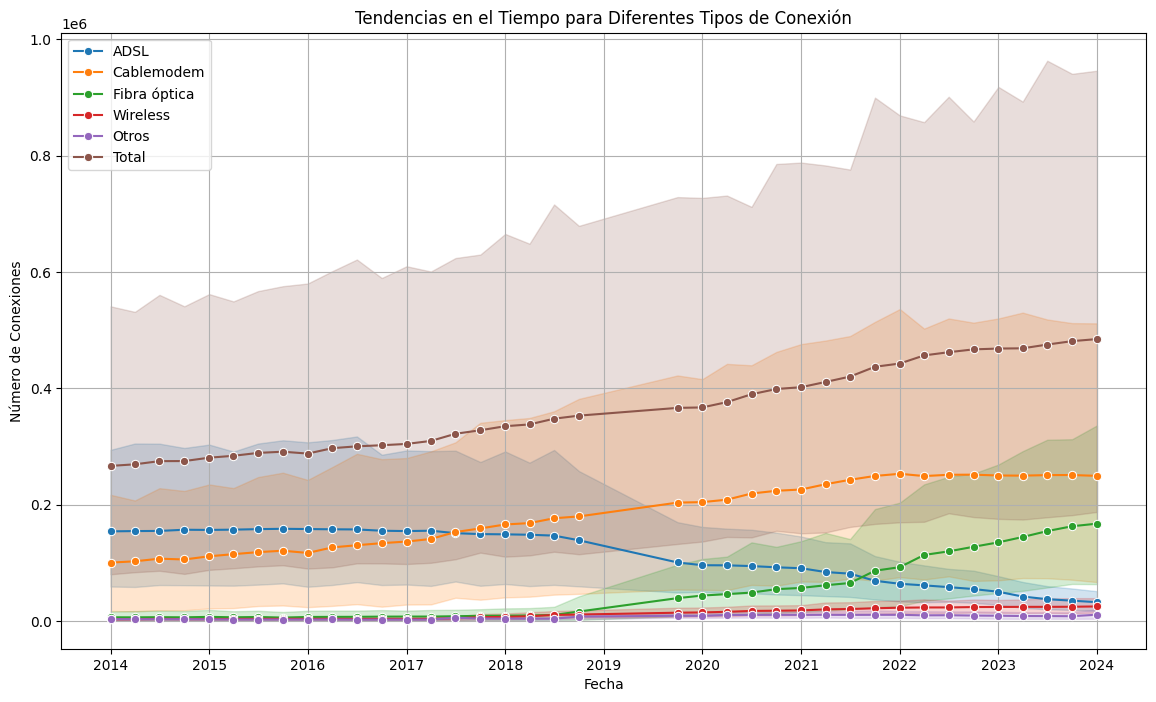

In [43]:

plt.figure(figsize=(14, 8))

# Graficar cada tipo de conexión
sns.lineplot(x='Fecha', y='ADSL', data=df_internet_axt, label='ADSL', marker='o')
sns.lineplot(x='Fecha', y='Cablemodem', data=df_internet_axt, label='Cablemodem', marker='o')
sns.lineplot(x='Fecha', y='Fibra óptica', data=df_internet_axt, label='Fibra óptica', marker='o')
sns.lineplot(x='Fecha', y='Wireless', data=df_internet_axt, label='Wireless', marker='o')
sns.lineplot(x='Fecha', y='Otros', data=df_internet_axt, label='Otros', marker='o')
sns.lineplot(x='Fecha', y='Total', data=df_internet_axt, label='Total', marker='o')

plt.title('Tendencias en el Tiempo para Diferentes Tipos de Conexión')
plt.xlabel('Fecha')
plt.ylabel('Número de Conexiones')
plt.legend()
plt.grid(True)
plt.show()


Con el anterior gráfico se puede observar cómo hay una tendencia al crecimiento de la fibra óptica, un estancamiento del cablemodem, y caída de ADSL, seguramente por su inestabilidad y preferencia por otras tecnologías.

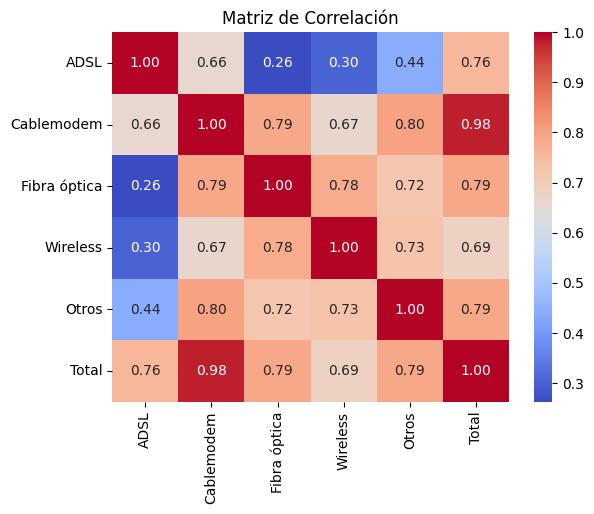

In [23]:
# Correlación entre las variables
correlation_matrix = df_internet_axt[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


Analiza los resultados y tendencias observadas. Busca patrones, anomalías o insights relevantes.

Tendencias temporales: ¿Cómo cambian los tipos de conexión a lo largo del tiempo?
Diferencias entre provincias: ¿Existen provincias con un uso significativamente mayor de ciertos tipos de conexión?
Distribución y correlaciones: ¿Hay alguna relación fuerte entre el uso de diferentes tipos de conexión?